In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x = np.array([-2, 1, 2], dtype=float)
y = np.array([3, 0, 2], dtype=float)

In [13]:
def lagranz(x,y,x0):
    z=0
    for j in range(len(y)):
        p1, p2 =1, 1
        for i in range(len(x)):
            if i!=j:   
                p1=p1*(x0-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z

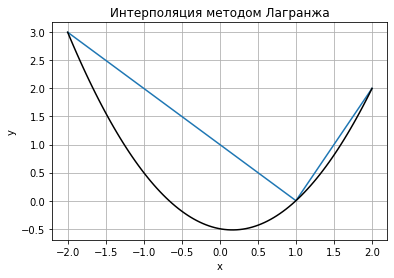

In [14]:
xnew = np.linspace(np.min(x),np.max(x),100)
ynew = [lagranz(x,y,i) for i in xnew]
plt.title("Интерполяция методом Лагранжа") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.plot(x, y, xnew, ynew, "black")
plt.grid(True)
plt.show()

In [15]:
def newton(x,y,x0):
    z=y[0]
    for i in range(len(y)-1):
            if i == 0:
                alpha = (y[i]-y[i+1])/(x[i]-x[i+1])
                alpha1= alpha
                alpha2= (y[i+1]-y[i+2])/(x[i+1]-x[i+2])
                z=z+alpha*(x0-x[i])   
            if i == 1:
                alpha = (alpha1 - alpha2)/(x[i-1]-x[i+1])
                z=z+alpha*(x0-x[i-1])*(x0-x[i])
    return z

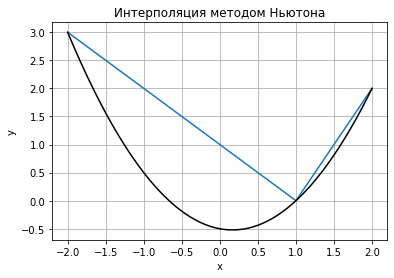

In [16]:
xnew = np.linspace(np.min(x),np.max(x),100)
ynew = [newton(x,y,i) for i in xnew]
plt.title("Интерполяция методом Ньютона") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.plot(x, y, xnew, ynew, "black")
plt.grid(True)
plt.show()

In [17]:
from scipy.interpolate import CubicSpline

x = [1, 1.2, 1.4, 1.6, 1.8, 2]
y = [0.8, 1.9, 3.2, 4.1, 5.0, 6.0]

cs = CubicSpline(x, y)

print(cs(1.1))

1.2695833333333335


In [18]:
x = [-1, 0, 1, 3, 4]
y = [1, 3, 5, 9, 11]

def kvadrat(x, y, x0 = None):
    x_kv = 0
    xiyi = 0
    for i in range(len(x)):
        x_kv += x[i]*x[i]   
        xiyi += x[i]*y[i]
    a = [[x_kv, sum(x)], [sum(x), len(x)]]
    b = [xiyi, sum(y)]
    a_matrix = np.matrix(a)
    b_matrix = np.matrix(b).transpose()
    inv_a = a_matrix.getI()
    total = inv_a.dot(b_matrix)
    total = np.squeeze(np.asarray(total))
    if x0 is None:
        return str(total[0]) + 'x+' + str(total[1]) 
    return total[0] * x0 + total[1]

In [19]:
kvadrat(x, y)

'2.0x+3.0'

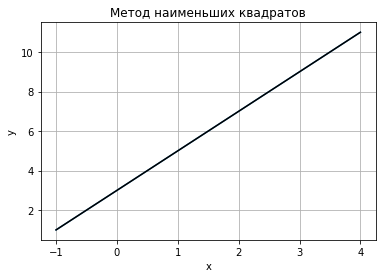

In [20]:
xnew = np.linspace(np.min(x),np.max(x),100)
ynew = [kvadrat(x,y,i) for i in xnew]
plt.title("Метод наименьших квадратов") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.plot(x, y, xnew, ynew, "black")
plt.grid(True)
plt.show()